# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 6

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **17 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [437]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.diagnostic import lilliefors
from tqdm.notebook import tqdm

%matplotlib inline


# Критерии согласия

## Теоретическая часть



### Задача 1. (основной поток, 5 баллов)
 Компания по производству кормов для собак провела опрос $5000$ владельцев собак о том, какой корм предпочитают их питомцы. По результатам опроса оказалось, что $1010$ собак предпочитают корм со вкусом лосося, $2200$ &mdash; со вкусом курицы, $950$ &mdash; со вкусом говядины, а все остальные собаки предпочитают корм с овощами. Компания сделала предположение, что вероятности предпочтения кормов равны соответственно $\theta, 2\theta, \theta, 1-4\theta$,
	где $\theta\in(0,1/4)$. Верно ли данное предположение? Выпишите теоретические формулы и код для подсчета значения статистики и p-value  в `scipy`. Вычисление статистики и p-value можно выполнить в Питоне.


$$\chi^2(\widehat{\theta}) = \sum_{j=1}^{k}\dfrac{(\mu_j - nP_j^o(\widehat{\theta}))^2}{nP_j^o(\widehat{\theta})}$$

$$\text{Из метода максимального правдоподобия:}\\\widehat{\theta} = 0.208$$

In [6]:
np.array([0.208, 0.416, 0.208, 1-4*0.208]) * 5000

array([1040., 2080., 1040.,  840.])

In [29]:
sps.chisquare(f_obs=[1010, 2200, 950, 840], f_exp=[1040, 2080, 1040, 840], ddof=1) #ddof = 1 так как оцениваем 1 параметр(так было на семинаре)

Power_divergenceResult(statistic=15.576923076923077, pvalue=0.00041449007074133005)

p-value < 0.005 $\rightarrow$ Отвергаем теорию о таком распределении вероятности предпочтения кормов

## Практическая часть

При решении стоит использовать **готовые реализации критериев из** `scipy.stats`. При возникновении затруднений посмотрите в ноутбук с лекции 9.
________________
### Задача 2. (все потоки, 8 баллов)

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий хи-квадрат для проверки корректности генерации выборки $U\{1, ..., 10\}$ (дискретное равномерное распределение). Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения. Подберите размер выборки такой, чтобы выполнялись условия применимости критерия хи-квадрат. Поясните свой выбор.





In [584]:
def chisq(mu, n, p):
    mu = np.array(mu)
    p = np.array(p)
    chi_stat = sum((mu - n * p) ** 2 / (n * p))
    p_val = sps.chi2(len(mu)-2).sf(chi_stat) # тут уже полагается ddof = 1
    return (chi_stat, p_val)

sample = sps.randint(1, 11).rvs(200)
binned_sample = np.unique(sample, return_counts=True)[1]
print(binned_sample)
chisq(binned_sample, 200, 0.1)

[20 20 22 18 23 24 17 17 22 17]


(3.2000000000000006, 0.9211865127702811)

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления дискретной плотности (вероятности) воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.




In [588]:
sample = sps.poisson(mu=5).rvs(size=1000)
binned_sample_raw = f_obs = np.array(np.unique(sample, return_counts=True))
binned_sample_clear = np.append(binned_sample_raw[1][:9], sum(binned_sample_raw[1][9:]))
theory_raw = np.array(sps.poisson(mu=5).pmf(np.arange(0, binned_sample_raw.shape[1])))
theory_clear = np.append(theory_raw[:9], sum(theory_raw[9:]))
theory_clear[-1] += 1 - sum(theory_clear)
print("raw:        ", binned_sample_raw[1])
print("clear:      ", binned_sample_clear)
chi_stat, pval = chisq(binned_sample_clear, 1000, theory_clear)
print(f"Our chi square  : chi_stat = {chi_stat}, p_val = {pval}")
chi_stat, pval = sps.chisquare(f_obs=binned_sample_clear, f_exp=theory_clear*1000, ddof=1)
print(f"Scipy chi square: chi_stat = {chi_stat}, p_val = {pval}")

raw:         [  5  29  85 146 178 166 155 107  57  42  16  10   4]
clear:       [  5  29  85 146 178 166 155 107  57  72]
Our chi square  : chi_stat = 3.7443305046493585, p_val = 0.8794227999454525
Scipy chi square: chi_stat = 3.7443305046493576, p_val = 0.8794227999454525


**Вывод:** Мы не отвергаем гипотезу о том, что код scipy.distr.rvs генерирует желаемую нами выборку. Безусловно, в небольшом количестве случаев p-value может оказаться  меньше чем 0.05, тогда это будет ошибкой первого рода (ни один из критериев не догма), которую, к сожалению, можно только минимизировать, но не избавиться от нее в целом.

__________________
### Задача 3. (основной поток, 8 баллов)

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка;
* Лиллиефорса.

При этом критерий Колмогорова универсален, но существует его модификация для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можно взять реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>. Критерий Колмогорова можно попробовать применить для конкретной $F_0$ (оценив ее), пример использования можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинаре разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100. В данном случае можно привести теоретические соображения, согласно которым стоит использовать количество генерируемых выборок `sample_count `$\ge 10^6$, но для ускорения работы при выполнении задания можете использовать `sample_count = 10**4`.



*Подсказка:*

In [ ]:
max_sample_size = ...
sample_count = ...
is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = ...
        is_reject_<критерий>[i, j] = ...

Ваша реализация:

In [564]:
max_sample_size = 100
sample_count = 10 ** 4
is_reject_kolm = np.zeros((max_sample_size, sample_count))
is_reject_lil_fors = np.zeros((max_sample_size, sample_count))
is_reject_jarqaya_bebra = np.zeros((max_sample_size, sample_count))
is_reject_shapito = np.zeros((max_sample_size, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = sps.norm.rvs(size=i)
        
        stat, pval = sps.kstest(rvs=sample, cdf=sps.norm.cdf)
        is_reject_kolm[i, j] = (pval < 0.05)
        
        stat, pval = lilliefors(sample)
        is_reject_lil_fors[i, j] = (pval < 0.05)
        
        stat, pval = sps.jarque_bera(sample)
        is_reject_jarqaya_bebra[i, j] = (pval < 0.05)
        
        stat, pval = sps.shapiro(sample)
        is_reject_shapito[i, j] = (pval < 0.05)

        
alpha_kolm = is_reject_kolm.mean(axis=1)
alpha_lil_fors = is_reject_lil_fors.mean(axis=1)
alpha_jarqaya_bebra = is_reject_jarqaya_bebra.mean(axis=1)
alpha_shapito = is_reject_shapito.mean(axis=1)

  0%|          | 0/95 [00:00<?, ?it/s]

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

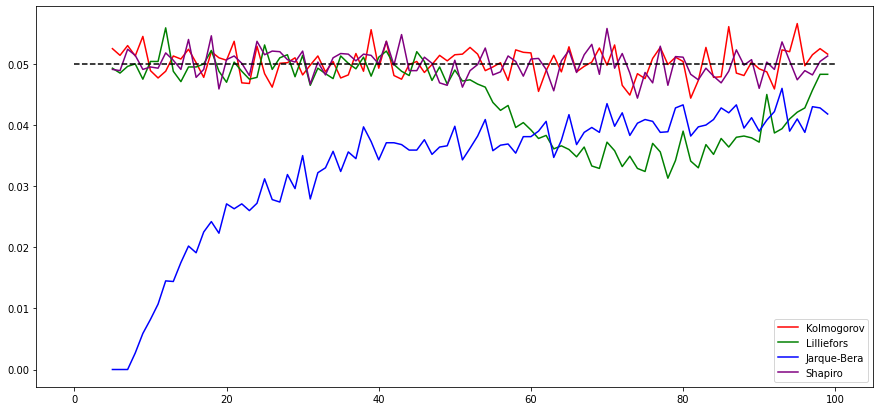

In [567]:
plt.figure(figsize=(15,7))
grid = np.arange(5, max_sample_size)

plt.plot(grid, alpha_kolm[5:], color="red", label="Kolmogorov")
plt.plot(grid, alpha_lil_fors[5:], color="green", label="Lilliefors")
plt.plot(grid, alpha_jarqaya_bebra[5:], color="blue", label="Jarque-Bera")
plt.plot(grid, alpha_shapito[5:], color="purple", label="Shapiro")
plt.hlines(0.05, 0, 100, color="black", ls="--")
plt.legend()

plt.show()

Какой можно сделать вывод?

Уровень значимости критерия Колмогорова и Шапиро осцилиррует около значения 0.05.

Уровень значимости критерия Жарка-Бера зависит от размера выборки и увеличивается с увеличением выборки. Является самым лучшим (так как мы меньше всего хотим отвергать верные теории) критерием при размере выборки размером до 60.

Уровень значимости критерия Лиллиефорса ведет себя немного странно, прогибаясь примерно с 40 до 100. Является самым лучшим (так как мы меньше всего хотим отвергать верные теории) критерием при размере выборки размером от 60 до 90.

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [568]:
max_sample_size = 100
sample_count = 10 ** 4
is_reject_kolm = np.zeros((max_sample_size, sample_count))
is_reject_lil_fors = np.zeros((max_sample_size, sample_count))
is_reject_jarqaya_bebra = np.zeros((max_sample_size, sample_count))
is_reject_shapito = np.zeros((max_sample_size, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = sps.cauchy.rvs(size=i)
        
        stat, pval = sps.kstest(rvs=sample, cdf=sps.norm.cdf)
        is_reject_kolm[i, j] = (pval < 0.05)
        
        stat, pval = lilliefors(sample)
        is_reject_lil_fors[i, j] = (pval < 0.05)
        
        stat, pval = sps.jarque_bera(sample)
        is_reject_jarqaya_bebra[i, j] = (pval < 0.05)
        
        stat, pval = sps.shapiro(sample)
        is_reject_shapito[i, j] = (pval < 0.05)

        
beta_kolm = is_reject_kolm.mean(axis=1)
beta_lil_fors = is_reject_lil_fors.mean(axis=1)
beta_jarqaya_bebra = is_reject_jarqaya_bebra.mean(axis=1)
beta_shapito = is_reject_shapito.mean(axis=1)

  0%|          | 0/95 [00:00<?, ?it/s]

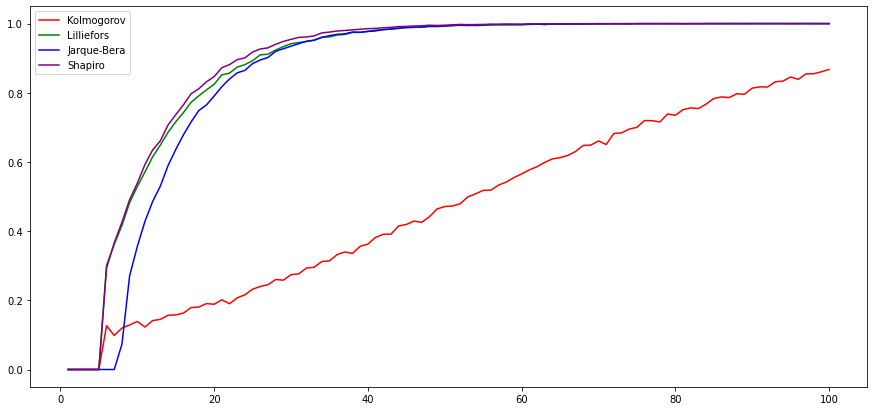

In [563]:
plt.figure(figsize=(15,7))
grid = np.arange(5, max_sample_size+1)

plt.plot(grid, beta_kolm[5:], color="red", label="Kolmogorov")
plt.plot(grid, beta_lil_fors[5:], color="green", label="Lilliefors")
plt.plot(grid, beta_jarqaya_bebra[5:], color="blue", label="Jarque-Bera")
plt.plot(grid, beta_shapito[5:], color="purple", label="Shapiro")
plt.legend()

plt.show()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

По графику видно, что наименее мощным является критерий Колмогорова, а самым мощным - критерий Шапиро(немного получше, чем критерий Лиллиефорса при размерах примерно от 15 до 40).

**3*.** (4 балла) Распределение [Стьюдента](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 

Постройте на одном графике графики плотности распределения Коши, распределения Стьюдента с 1, 5, 10 степенями свободы и стандартного нормального распределения. Как меняется форма графика распределения Стьюдента с изменением количества степеней свободы? 

In [ ]:
<...>

Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно реализовать функцию (например, принимающую количество степенй свободы). Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от **количества степеней свободы** для каждого из трех критериев. Не забудьте добавить легенду и подписать оси.

In [ ]:
<...>

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы. Объясните наблюдаемую зависимость мощности от степени свободы.

<...>

__________________
### Задача 4. (основной поток, 12 баллов)


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>. Для этого зайдите в папку "DataFolder" и скачайте файл `wine.data`. Читать файл можно с помощью функции `read_csv`.  В этом датасете представлены различные характеристики вин. Возьмите все колонки, кроме `Class` (класс вина). В дальнейшем, как и раньше, будем называть колонки признаками.

In [382]:
data = pd.read_csv("wine.data")
data = data.drop("Class", axis=1)
data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько строк и столбцов, используя `plt.subplot`.

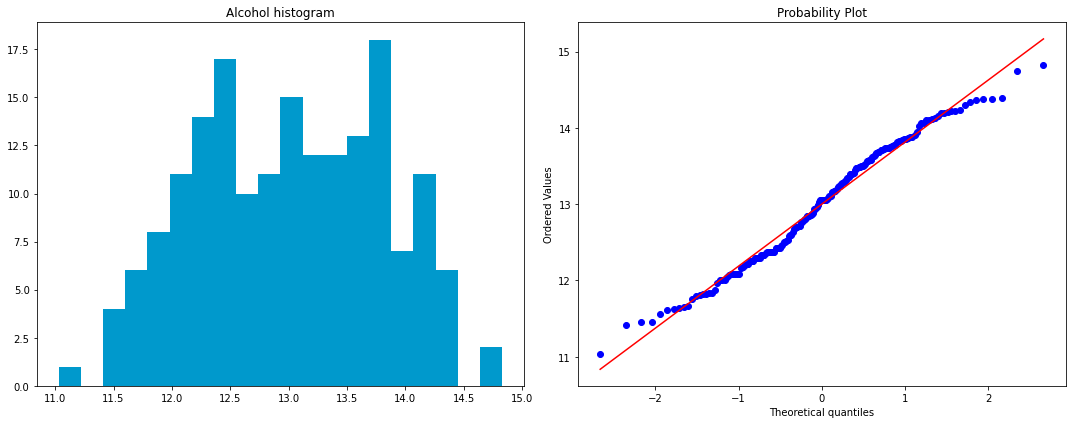

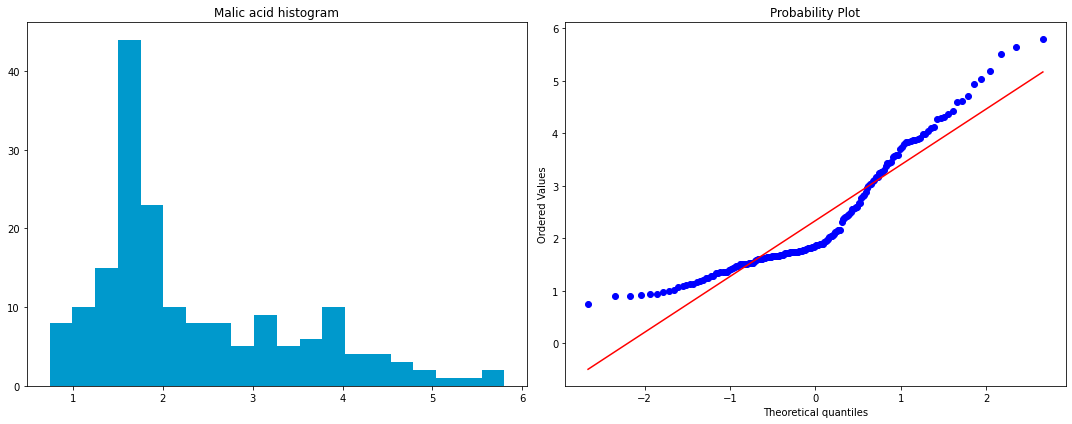

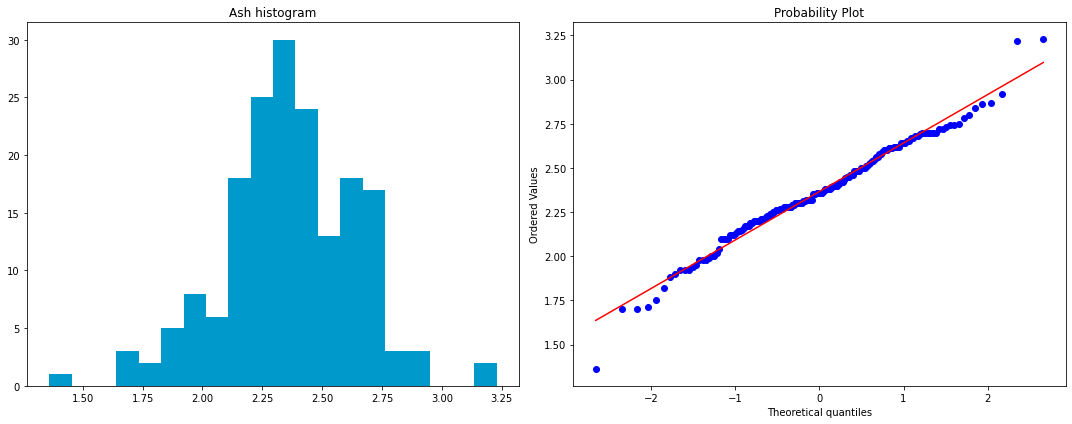

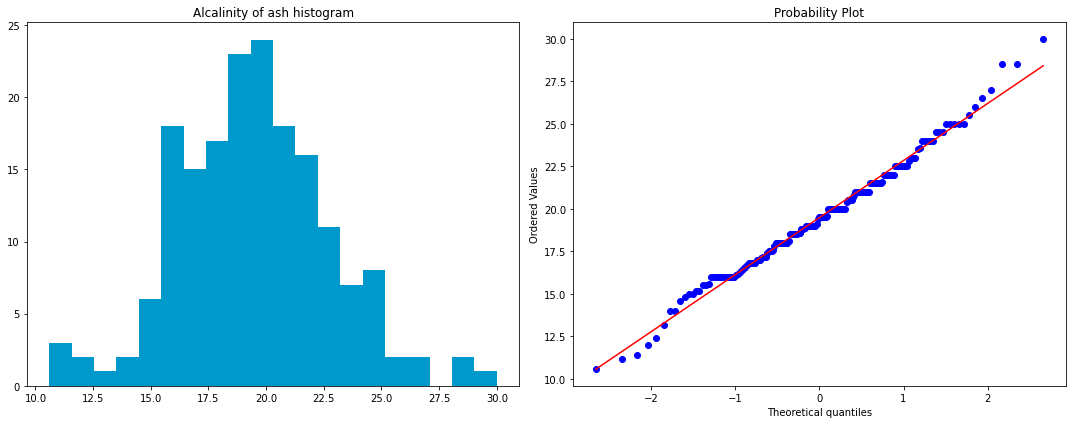

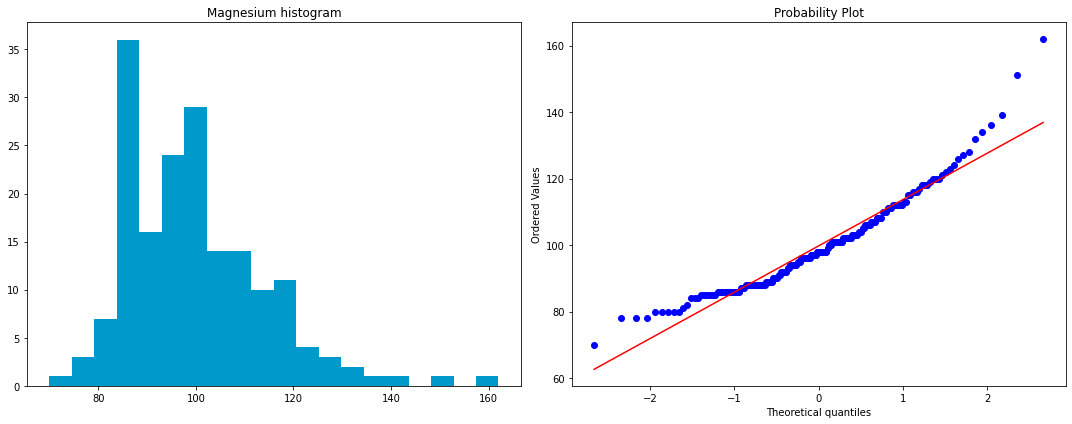

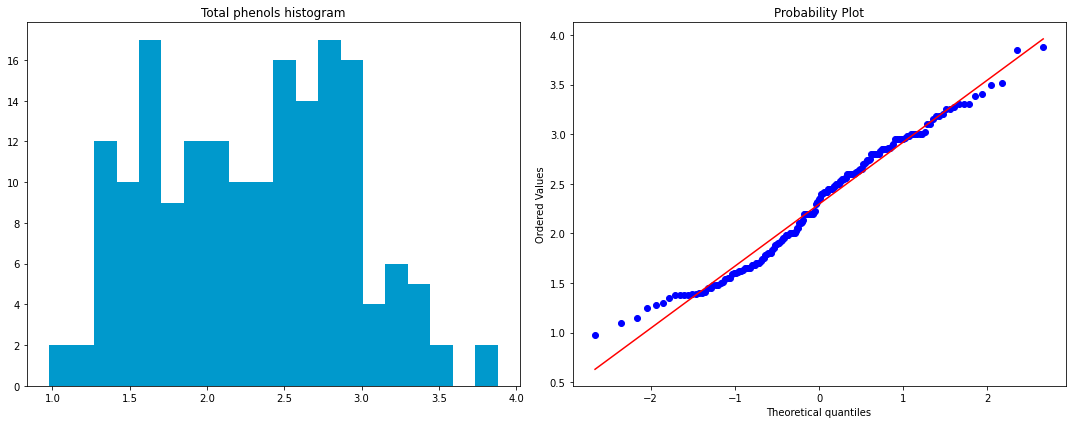

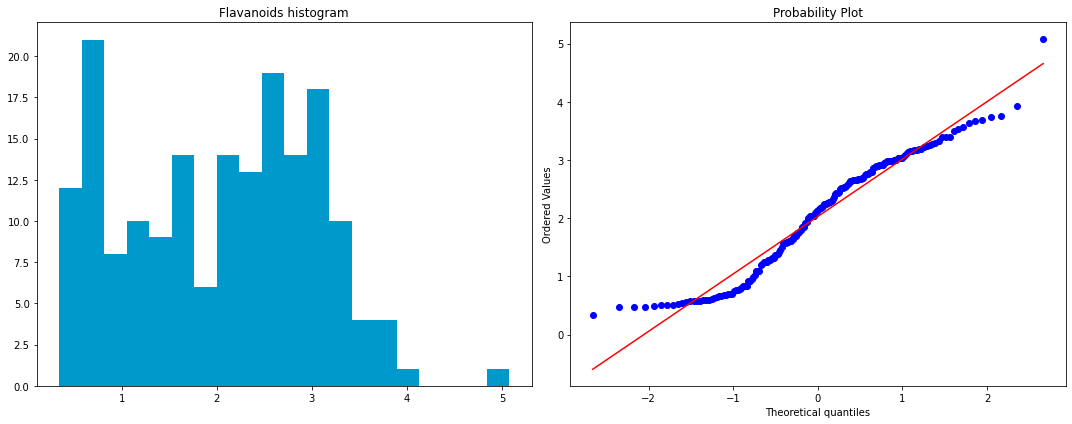

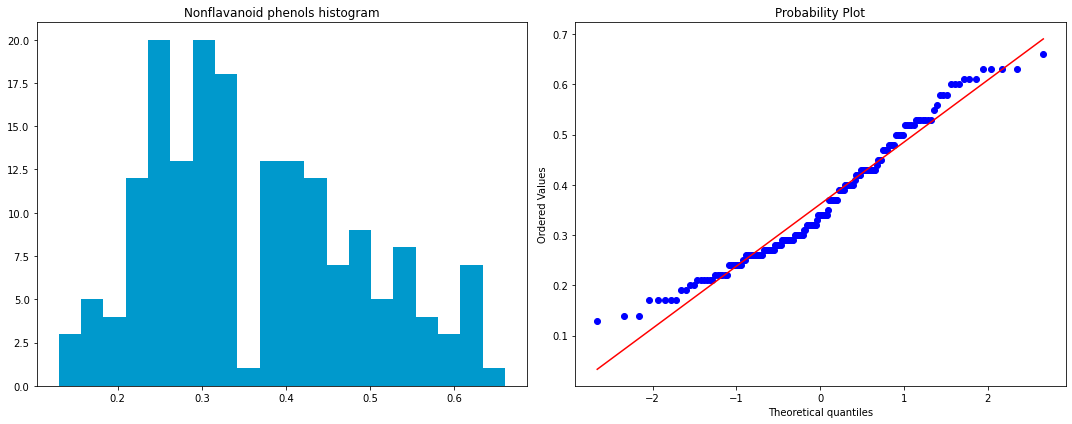

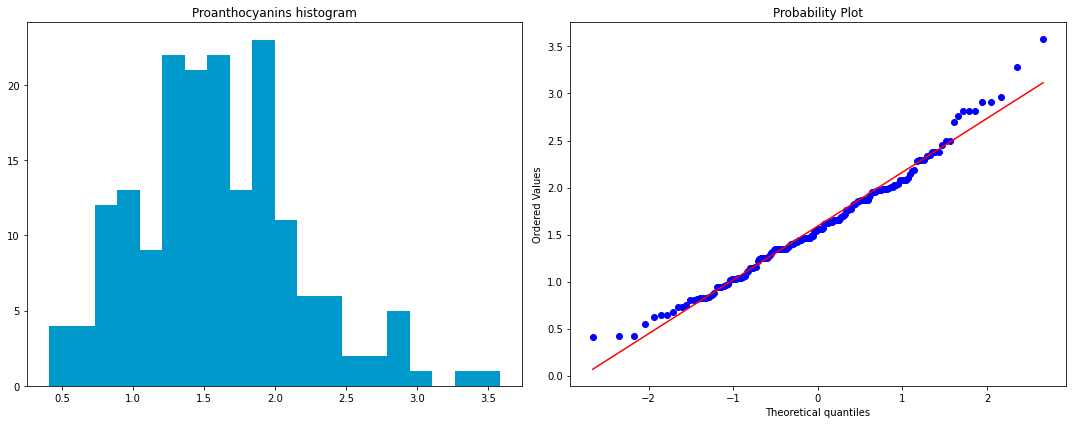

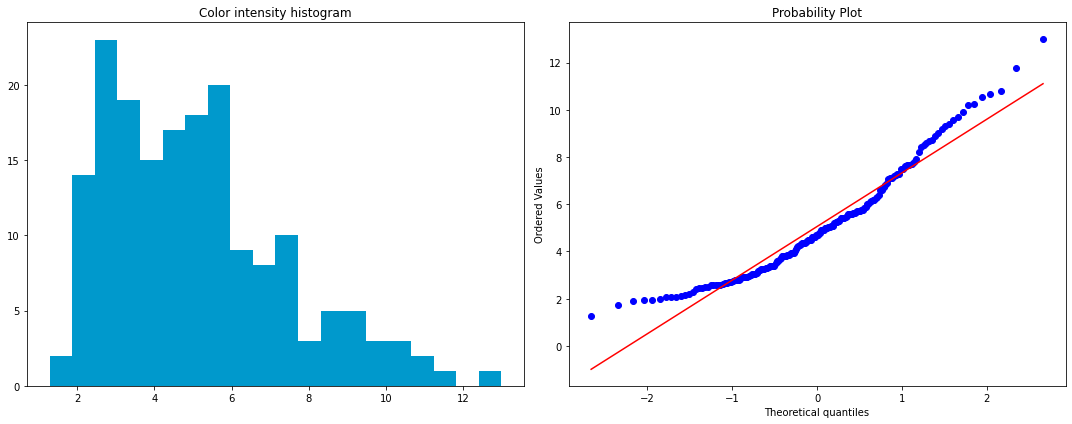

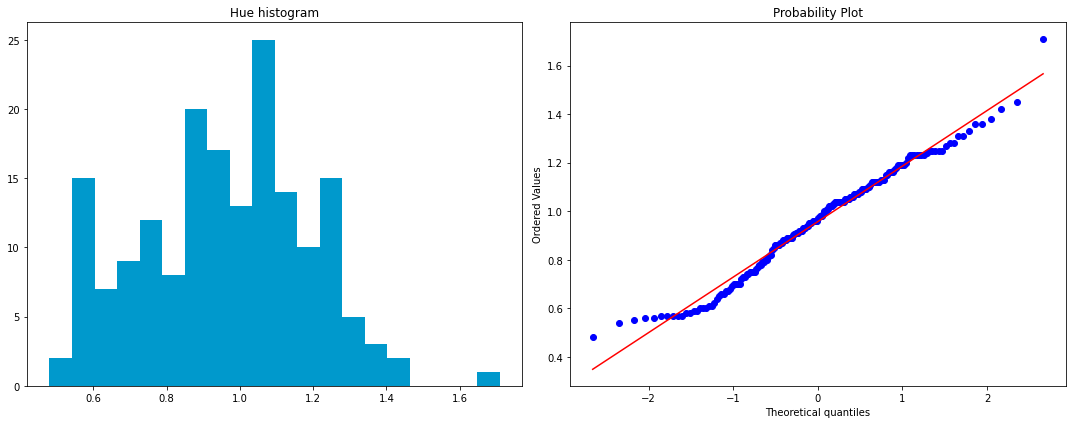

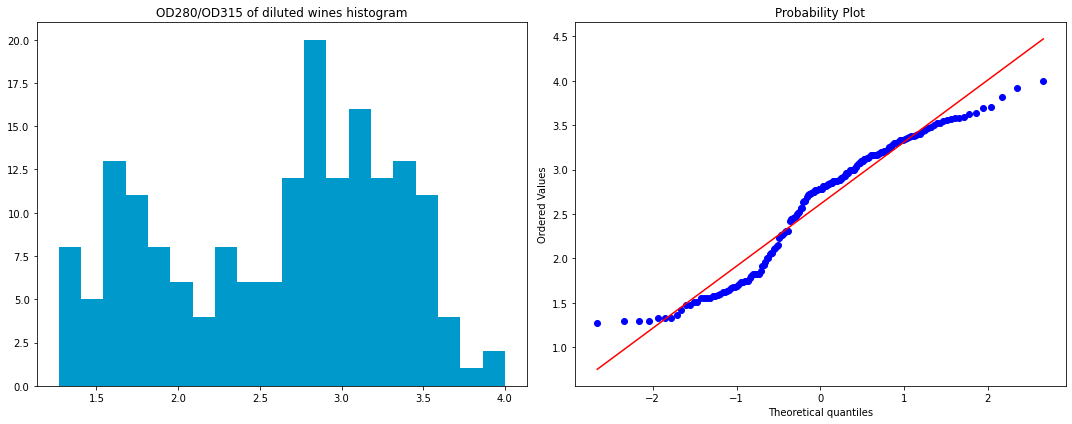

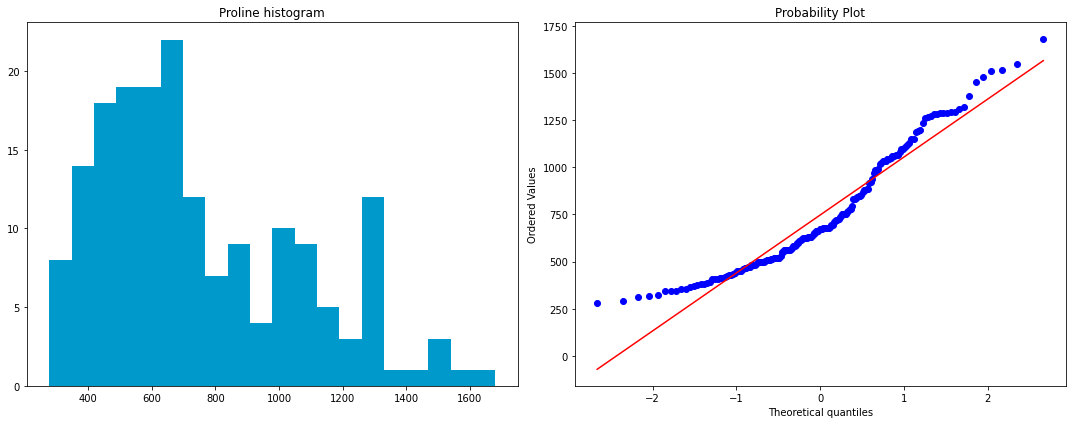

In [389]:
for sign in data:
    sample = data[sign]
    
    plt.figure(figsize=(15, 6))

    ax = plt.subplot(1, 2, 1)
    
    grid = np.linspace(sps.norm.ppf(0.001)-0.1, sps.norm.ppf(0.999)+0.1, 178)
    plt.hist(sample, bins=20, color=blue)
    plt.title(sign + " histogram")

    ax = plt.subplot(1, 2, 2)
    sps.probplot(sample, plot=ax)

    plt.tight_layout()
    plt.show()

Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** На глаз: Alcohol, Ash, Alcaliniti of ash, Total phenols, Proanthocyanins, Hue, так как на QQ плоте точки образуют нечто, похожее на прямую

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. 

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** Критерии Лиллиефорса, Жарка-Бера и Шапиро

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:** Для минимизации групповой ошибки первого рода (мы не верим что кто-то может быть экстрасенсом).

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** Мы ничего не можем говорить о зависимости/независимости выборок, поэтому будем использовать критерий Холма - наиболее мощный критерий, не требующий зависимости/независимости выборок.

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** Смотрим на скорректированный p-value, если хоть для одного критерия меньше, чем 0.05, то отклоняем.

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:** Говорим, что выборка согласуется с основной гипотезой.

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [599]:
#methods and methods names init
methods_names=["Lilliefors", "Jarque-Bera", "Shapiro"]
methods = [lilliefors, sps.jarque_bera, sps.shapiro]
pvals = []
#create json table
data_wine_raw = {}

#getting pvals by every method
for attr in data.columns.values:
    for method_name, method in zip(methods_names, methods):
        raw_key = method_name + " p-value"
        stat, pval = method(data[attr])
        
        if raw_key not in data_wine_raw.keys():
            #add a new column to json table
            data_wine_raw[raw_key] = {}
        data_wine_raw[raw_key][attr] = round(pval, 4)
        pvals.append(pval)

#correct those pvalues to minimise type I group error
reject, pvals_corr = multipletests(pvals, method="holm", alpha=0.05)[:2]
pvals_corr = pvals_corr.reshape(13, 3)
reject = reject.reshape(13, 3)
'''
print(np.array(pvals).reshape(13, 3))
print()
print(pvals_corr)
'''

#add corrected pvalus and rejection results to json table
for i, attr in enumerate(data.columns.values):
    for j, method_name in enumerate(methods_names):
        if method_name + " p-value_corr" not in data_wine_raw.keys():
            #add new columns to json table
            data_wine_raw[method_name + " p-value_corr"] = {}
            data_wine_raw[method_name + " reject"] = {}
        data_wine_raw[method_name + " p-value_corr"][attr] = round(pvals_corr[i][j], 4)
        data_wine_raw[method_name + " reject"][attr] = reject[i][j]
    
    #add the total result on rejection to json table
    if "Total rejection" not in data_wine_raw.keys():
        data_wine_raw["Total rejection"] = {}
    data_wine_raw["Total rejection"][attr] = reject[i][0] or reject[i][1] or reject[i][2]

#turn json table into Dataframe
data_wine = pd.DataFrame(data_wine_raw)
data_wine

,Lilliefors p-value,Jarque-Bera p-value,Shapiro p-value,Lilliefors p-value_corr,Lilliefors reject,Jarque-Bera p-value_corr,Jarque-Bera reject,Shapiro p-value_corr,Shapiro reject,Total rejection
Alcohol,0.0584,0.0611,0.0201,0.5838,False,0.5838,False,0.2807,False,False
Malic acid,0.0010,0.0000,0.0000,0.0280,True,0.0000,True,0.0000,True,True
Ash,0.1865,0.0085,0.0387,0.9325,False,0.1527,False,0.4642,False,False
Alcalinity of ash,0.0989,0.2509,0.2639,0.6920,False,0.9325,False,0.9325,False,False
Magnesium,0.0025,0.0000,0.0000,0.0574,False,0.0000,True,0.0000,True,True
Total phenols,0.0351,0.0631,0.0044,0.4561,False,0.5838,False,0.0923,False,False
Flavanoids,0.0047,0.0527,0.0000,0.0931,False,0.5800,False,0.0005,True,True
Nonflavanoid phenols,0.0010,0.0107,0.0001,0.0280,True,0.1821,False,0.0032,True,True
Proanthocyanins,0.2166,0.0078,0.0145,0.9325,False,0.1490,False,0.2313,False,False
Color intensity,0.0022,0.0000,0.0000,0.0524,False,0.0003,True,0.0000,True,True


Для каких признаков нормальность не отвергается?

**Ответ:**

Нормальность не отвергается для признаков:
- Alcohol
- Ash
- Alcaliniti of ash
- Total phenols
- Proanthocyanins
- Hue

**Вывод:** Мы проверили различные признаки разных вин на нормальность. ~~Теперь когда будем пить в компании сможем блеснуть своим исследованием.~~ Для проверки сначала использовались Q-Q plots и глаза, затем критетрии Лиллиефорса, Жарка-Бера и Шапиро. Выбор некольких критериев обусловлен тем, что разные критерии проверяют выполнение разных свойств, таким образом при большем количестве критериев(+ МПГ) мы точнее отвергаем/не отвергаем гипотезу о распределении. Самым мощным, как и было видно в прошлом номере, оказался критерий Шапиро.